In [517]:
import urllib 
from bs4 import BeautifulSoup  
import logging  
from urllib.request import urlopen
import requests
import re
import pandas as pd
from collections import defaultdict
import pickle
import numpy as np
import pandas as pd
import dateutil.parser
from datetime import timedelta

In [518]:
with open('MovieDict.pickle', 'rb') as handle:
  b = pickle.load(handle)

In [519]:
df1 = pd.DataFrame(b)

In [520]:
len(df)

500

In [626]:
[k for k,v in df1['directors'][0].items()]

['Ron Howard']

In [628]:
len(df1['directors'])

500

In [522]:
df1.head()

,actors,directors,domestic_total_gross,production,rating,release_date,runtime,title,url
0,"{'Jim Carrey': ([-455 days, 0:00:00], '0', 196...","{'Ron Howard': ([-812 days, 0:00:00], '0', 195...",260044825,123000000,PG,2000-11-17,104,How the Grinch Stole Christmas,http://www.boxofficemojo.com/movies/?id=grinch...
1,"{'Helen Hunt': ([-924 days, 0:00:00], '1', 196...","{'Robert Zemeckis': ([-1062 days, 0:00:00], No...",233632142,90000000,PG-13,2000-12-22,143,Cast Away,http://www.boxofficemojo.com/movies/?id=castaw...
2,"{'Thandie Newton': ([-812 days, 0:00:00], '1',...","{'John Woo': ([-2155 days, 0:00:00], None, 194...",215409889,125000000,PG-13,2000-05-24,123,Mission: Impossible II,http://www.boxofficemojo.com/movies/?id=mi2.htm
3,"{'Joaquin Phoenix': ([-217 days, 0:00:00], '0'...","{'Ridley Scott': ([-294 days, 0:00:00], None, ...",187705427,103000000,R,2000-05-05,155,Gladiator,http://www.boxofficemojo.com/movies/?id=gladia...
4,"{'Helen Hunt': ([-924 days, 0:00:00], '1', 196...","{'Nancy Meyers': ([-2100 days, 0:00:00], None,...",182811707,70000000,PG-13,2000-12-15,127,What Women Want,http://www.boxofficemojo.com/movies/?id=whatwo...


In [599]:
data1 = pd.DataFrame()
for i in range(0, len(df1['directors'])):
    directors = pd.DataFrame(df1['directors'][i])
    directors=directors.T
    directors['title']=df1['title'][i]
    directors['Domestic'] = df1['domestic_total_gross'][i]
    directors['production'] = df1['production'][i]
    directors['runtime'] = df1['runtime'][i]
    directors['release_date'] = df1['release_date'][i]
    data1 = data1.append(directors)
#actors.append(df['actors'][1])
# data1.columns = ['time passed', 'gender']
data1 = data1.reset_index()
#data2 = data2.reset_index()
# data2
data1.rename(columns={'index': 'director', 0: 'days passed directors', 1: 'director_gender', 2: 'director_bday'}, inplace=True)
data1['days passed directors'] = data1['days passed directors'].apply(lambda x: abs(x[0]) if isinstance(x, list) else None)
data1['release_date'] = data1['release_date'].apply(lambda x: pd.to_datetime(x))
data1['director_bday'] = data1['director_bday'].apply(lambda x: pd.to_datetime(x))
data1['director_age'] = abs(data1['director_bday'] - data1['release_date'])
data1 = data1.drop('director_gender', 1)

In [638]:
data2 = pd.DataFrame()
for i in range(0, len(df1['actors'])):
    actors = pd.DataFrame(df1['actors'][i])
    actors=actors.T
    #actors['directors'] = [k for k,v in df1['directors'][i].items()]
    actors['title']=df1['title'][i]
    actors['Domestic'] = df1['domestic_total_gross'][i]
    actors['production'] = df1['production'][i]
    actors['runtime'] = df1['runtime'][i]
    actors['release_date'] = df1['release_date'][i]
    data2 = data2.append(actors)
data2 = data2.reset_index()
data2.rename(columns={'index': 'actor', 0: 'days passed actors', 1: 'actor_gender', 2: 'actor_bday'}, inplace=True)
data2['days passed actors'] = data2['days passed actors'].apply(lambda x: abs(x[0]) if isinstance(x, list) else None)
data2['release_date'] = data1['release_date'].apply(lambda x: pd.to_datetime(x))
data2['actor_bday'] = data2['actor_bday'].apply(lambda x: pd.to_datetime(x))
data2['actor_age'] = abs(data2['actor_bday'] - data2['release_date'])

In [600]:
data1.head(2)

,director,days passed directors,director_bday,title,Domestic,production,runtime,release_date,director_age
0,Ron Howard,812 days,1954-03-01,How the Grinch Stole Christmas,260044825,123000000,104,2000-11-17,17063 days
1,Robert Zemeckis,1062 days,1952-05-14,Cast Away,233632142,90000000,143,2000-12-22,17754 days


In [639]:
data2.head(2)

,actor,days passed actors,actor_gender,actor_bday,title,Domestic,production,runtime,release_date,actor_age
0,Anthony Hopkins,140 days,0,1937-12-31,How the Grinch Stole Christmas,260044825,123000000,104,2000-11-17,22967 days
1,Jim Carrey,455 days,0,1962-01-17,How the Grinch Stole Christmas,260044825,123000000,104,2000-12-22,14219 days


In [640]:
final = pd.merge(data1, data2, on = ['title','production', 'Domestic','runtime', 'release_date'])
final

,director,days passed directors,director_bday,title,Domestic,production,runtime,release_date,director_age,actor,days passed actors,actor_gender,actor_bday,actor_age
0,Ron Howard,812 days,1954-03-01,How the Grinch Stole Christmas,260044825,123000000,104,2000-11-17,17063 days,Anthony Hopkins,140 days,0,1937-12-31,22967 days
1,Boaz Yakin,1155 days,1966-06-20,Remember the Titans,115654751,30000000,113,2000-09-29,12520 days,Hayden Panettiere,168 days,1,1989-08-21,4057 days


In [589]:
len(data1)

254

In [590]:
len(data2)

1174

In [195]:
avgDays = []
numActors = []
actors2 = []
for a in df['actors']:
    if a:
        avgDays.append(np.mean([v[0] for k,v in a.items() if v[0] != None]))
        numActors.append(len(a))
        actors2.append([k for k,v in a.items() if v != None])
    else:
        avgDays.append(None)
        numActors.append(None)
        actors2.append(None)
len(avgDays)
df['actors'] = actors2
df['number of actors'] = numActors
df['avg of actors\' days since last movie'] = [abs((np.timedelta64(day) / np.timedelta64(1, 'D')) - 1).astype(int) if day else None for day in avgDays]

In [196]:
avgDays = []
numDirectors = []
directors2 = []
for a in df['directors']:
    if a:
        avgDays.append(np.mean([v for k,v in a.items() if v != None]))
        numDirectors.append(len(a))
        directors2.append([k for k,v in a.items() if v != None])
    else:
        avgDays.append(None)
        numDirectors.append(None)
        directors2.append(None)
len(avgDays)
df['directors'] = directors2
df['number of directors'] = numDirectors
df['avg of directors\' days since last movie'] = [abs((np.timedelta64(day) / np.timedelta64(1, 'D')) - 1).astype(int) if day else None for day in avgDays]

AttributeError: 'list' object has no attribute 'items'

## Plots

In [203]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
import seaborn as sns

TypeError: invalid type promotion

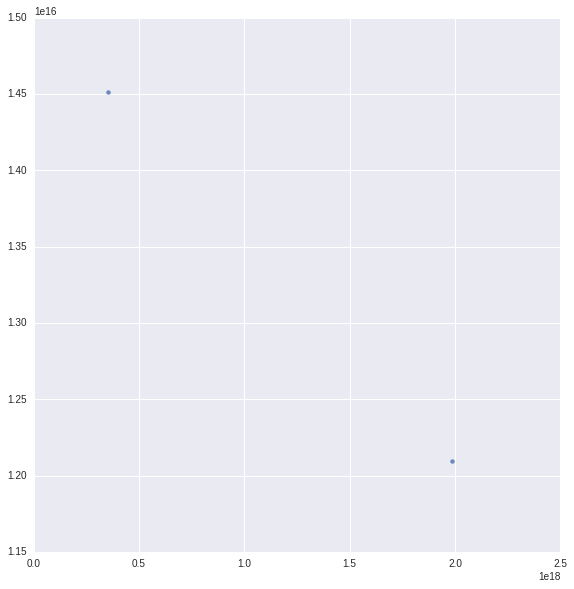

In [643]:
sns.lmplot(y = 'days passed actors', x = 'actor_age', data = final, size = 8)

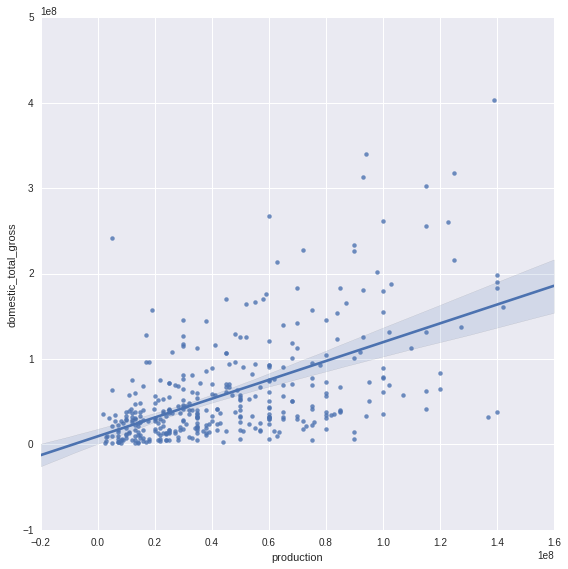

In [207]:
sns.lmplot(y = 'domestic_total_gross', x = 'production', data = df, size = 8)

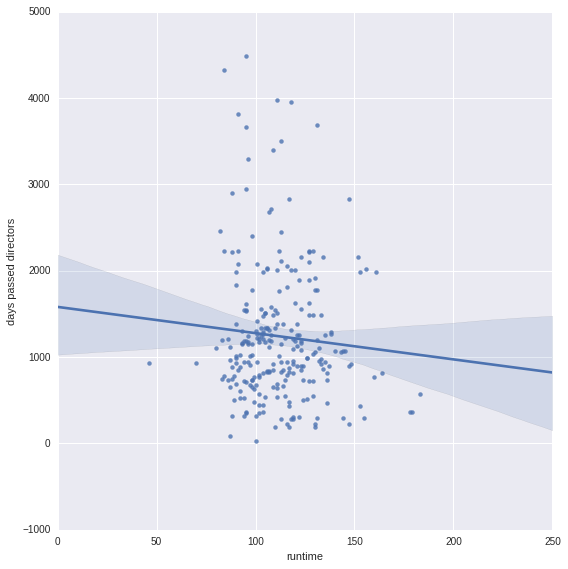

In [171]:
sns.lmplot(y = 'actor', x = 'runtime', data = data1, size = 8)

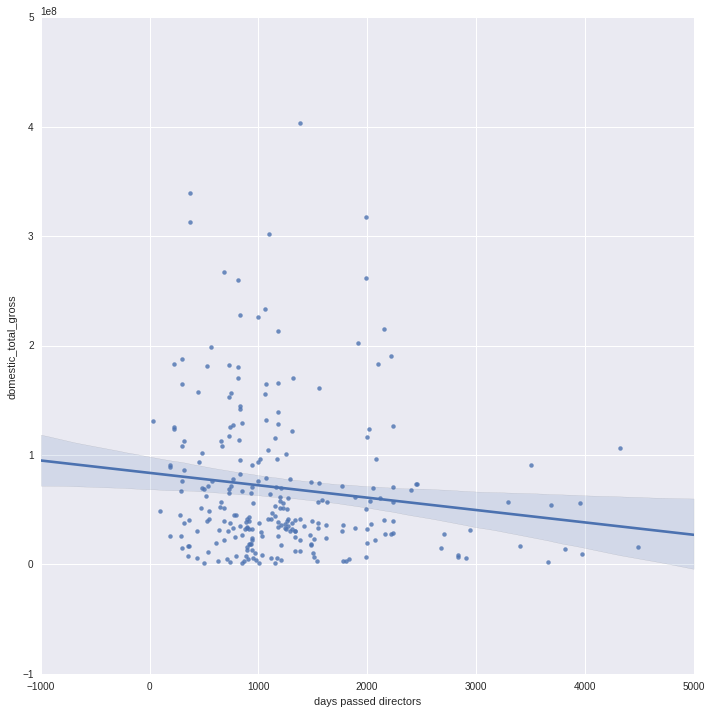

In [172]:
%matplotlib inline
sns.lmplot(y = 'domestic_total_gross', x = 'days passed directors', data = df, size=10)

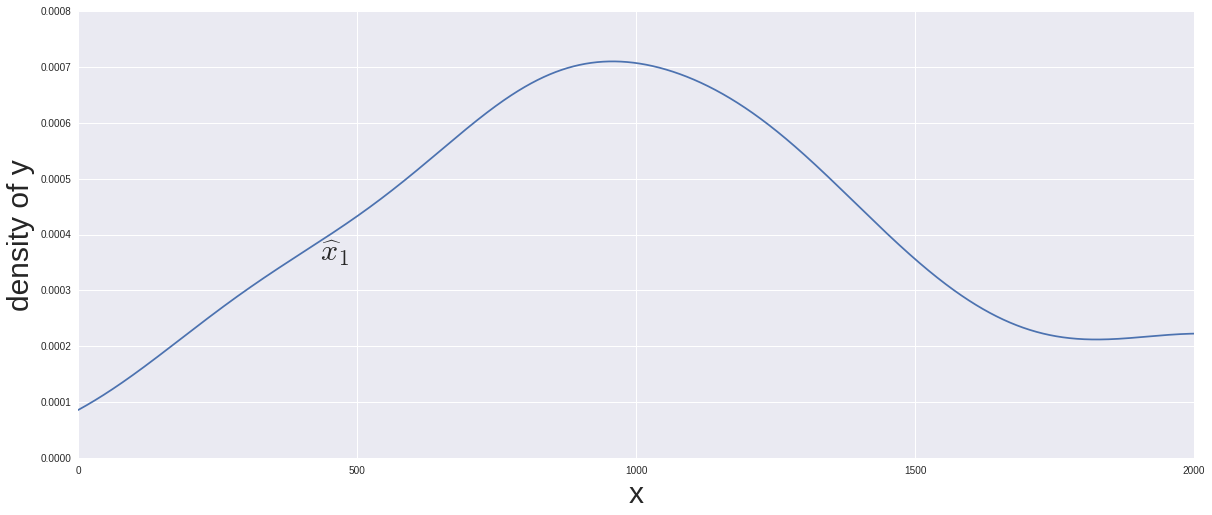

In [208]:
xs = np.linspace(0,2000,3200)
density_1 = gaussian_kde(df['days passed directors'].dropna())
density_1.covariance_factor = lambda : .25
density_1._compute_covariance()
plt.figure(figsize = (20,8))
plt.plot(xs,density_1(xs))
plt.fill(xs,density_1(xs),'b',alpha=0)
plt.xlabel('x',fontsize=30)    #add an x label
plt.ylabel('density of y',fontsize=30)    #add a y label
plt.text(np.mean(df['days passed actors'].dropna()),max(density_1(xs))/2.0,r'$\widehat{x}_1$',fontsize=30)   

KeyError: "avg of actors' days since last movie"

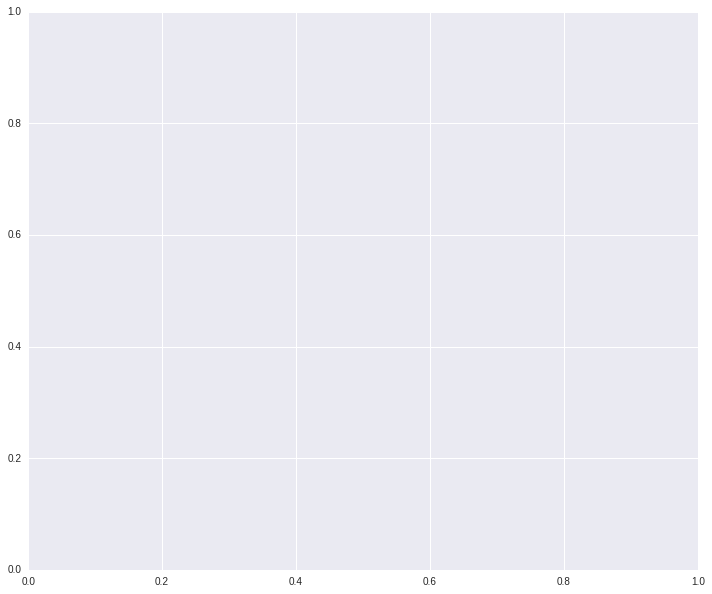

In [20]:
fig, axScatter = plt.subplots(figsize=(12, 10))
plt.scatter(df['domestic_total_gross'], df['avg of actors\' days since last movie'])
plt.title('Box Office Gross predicted by Avg. Days Passed since Last Movie', fontsize=16)
plt.ylabel('Domestic Gross', fontsize=12)
plt.xlabel('Avg of Actors\' days since last movie',fontsize=12)
plt.grid(True)

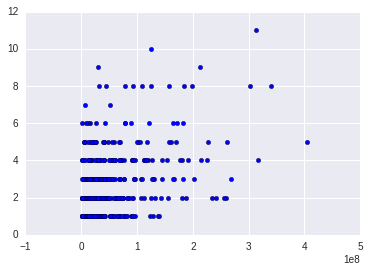

In [209]:
plt.scatter(df['domestic_total_gross'], df['number of actors'])

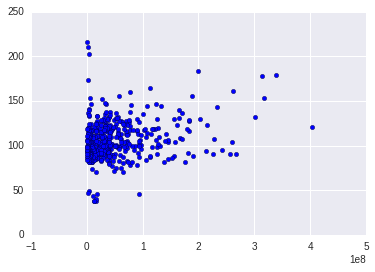

In [210]:
plt.scatter(df['domestic_total_gross'], df['runtime'])

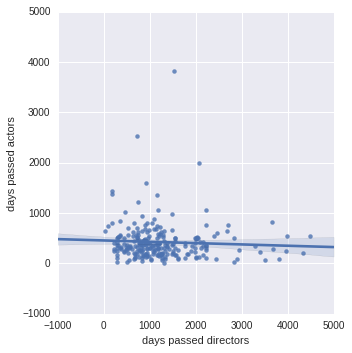

In [174]:
g = sns.lmplot( "days passed directors", "days passed actors",data = df)

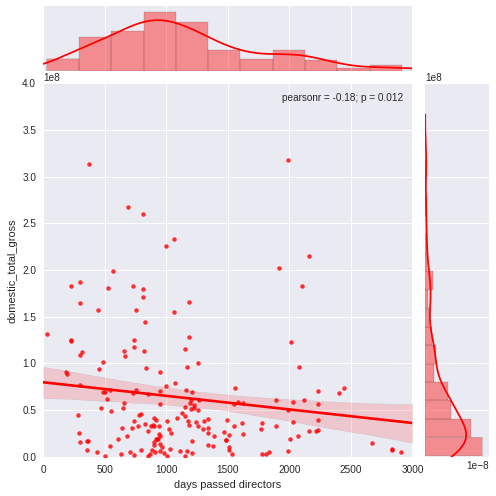

In [122]:
g = sns.jointplot( "days passed directors","domestic_total_gross", data=df, kind="reg",
                  ylim=(0, 400000000), xlim=(0, 3000), color="r", size=7)

In [536]:
merged['days passed actors'] = merged['days passed actors'].apply(lambda x: x[0] if isinstance(x, list) else None)
merged['days passed directors'] = merged['days passed directors'].apply(lambda x: x[0] if isinstance(x, list) else None)

In [537]:
merged['days passed actors'] = abs(merged['days passed actors'])
merged['days passed directors'] = abs(merged['days passed directors'])

## Models

In [644]:
merged.head(2)

,director,days passed directors,director gender,director bday,title,Domestic,production,runtime,actor,days passed actors,gender,bday
0,Ron Howard,"[-812 days, 0:00:00]",0,1954-03-01 00:00:00,How the Grinch Stole Christmas,260044825,123000000,104,Anthony Hopkins,"[-140 days, 0:00:00]",0,1937-12-31 00:00:00
1,Ron Howard,"[-812 days, 0:00:00]",0,1954-03-01 00:00:00,How the Grinch Stole Christmas,260044825,123000000,104,Jim Carrey,"[-455 days, 0:00:00]",0,1962-01-17 00:00:00


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import KFold, train_test_split
from patsy import dmatrices, dmatrix
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse
from sklearn.metrics import r2_score
from scipy.stats import linregress
from pylab import plot,show,hist

In [507]:
data = merged.ix[:, (1,3,4,5,10,11)]
dataNoNan = data.dropna()

In [509]:
y = dataNoNan['Domestic']
X = dataNoNan.drop(['Domestic'], 1)

In [510]:
X['intercept'] = 1

In [512]:
len(X)

533

In [511]:
X.head()

,days passed directors,production,runtime,days passed actors,gender,intercept
1,812 days,123000000,104,455 days,0,1
2,1062 days,90000000,143,924 days,1,1
3,1062 days,90000000,143,672 days,0,1
4,2155 days,125000000,123,140 days,0,1
5,2155 days,125000000,123,49 days,0,1


In [516]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

In [514]:
model = sm.OLS(y_train, X_train)
results = model.fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [515]:
results = model.fit()

In [243]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     domestic_total_gross   R-squared:                       0.408
Model:                              OLS   Adj. R-squared:                  0.388
Method:                   Least Squares   F-statistic:                     20.95
Date:                  Wed, 20 Apr 2016   Prob (F-statistic):           6.84e-16
Time:                          15:03:45   Log-Likelihood:                -3045.0
No. Observations:                   158   AIC:                             6102.
Df Residuals:                       152   BIC:                             6120.
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
production                1.1607      0.158      7.330      0.000         0.848     1.474
runtime                4.615e+04   2.74e+05      0.169      0.866     -4.95e+05  5.87e+05
number of actors       9.304e+06   2.48e+06      3.751      0.000       4.4e+06  1.42e+07
number of directors   -1.061e+07   1.57e+07     -0.676      0.500     -4.17e+07  2.04e+07
days passed directors -6469.6393   6320.513     -1.024      0.308      -1.9e+04  6017.759
days passed actors     2.526e+04   1.43e+04      1.769      0.079     -2956.335  5.35e+04
intercept             -1.061e+07   1.57e+07     -0.676      0.500     -4.17e+07  2.04e+07
==============================================================================
Omnibus:                       21.453   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.104
Skew:                           0.872   Prob(JB):                     2.15e-06
Kurtosis:                       3.962   Cond. No.                     8.75e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.46e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [244]:
y_predictTest = results.predict(X_test)

In [245]:
mse1  = mse(y_test, y_predictTest,  axis=0)
mse1

2500428424059458.5

In [246]:
rSquared = r2_score(y_test, y_predictTest)
rSquared

0.26897916826068413

In [406]:
rSqAdj = 1-(1-rSquared)*((len(y_test)-1)/(len(y_test)-len(X_test.columns))-1)
rSqAdj

0.90464945672965458